In [1]:
from deap import base, creator, tools, algorithms
import deap.benchmarks.tools as bt
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from numpy import pi
import operator
import pandas as pd
from matplotlib.ticker import MaxNLocator

creator.create("obj", base.Fitness, weights=(-1.0))
creator.create("Ind", list, fitness=creator.obj)

In [2]:
checkpoint_file = "checkpoint.pkl"
with open(checkpoint_file, "rb") as cp_file:
    cp = pickle.load(cp_file)

In [3]:
cp["input_file"]

{'control_variables': {'radius_top': {'min': 0.05, 'max': 0.35},
  'radius_bot': {'min': 0.05, 'max': 0.35},
  'total_pf': {'min': 0.02, 'max': 0.05}},
 'evaluators': {'openmc': {'order': 0,
   'input_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc.py'],
   'execute': [['aprun -n 2 -d 64 --env OMP_NUM_THREADS=64 openmc-0.12.2']],
   'inputs': ['radius_top', 'radius_bot', 'total_pf'],
   'output_script': ['aprun -n 1 -d 1 --env OMP_NUM_THREADS=1 python ',
    'fhr_plank_openmc_output.py'],
   'outputs': ['total_pf', 'keff2']}},
 'constraints': {'keff2': {'operator': ['>='], 'constrained_val': [1.36]}},
 'algorithm': {'objective': ['min'],
  'weight': [1.0],
  'optimized_variable': ['total_pf'],
  'pop_size': 64,
  'generations': 3,
  'parallel': 'job_control',
  'keep_files': 'all',
  'mutation_probability': 0.23,
  'mating_probability': 0.47,
  'selection_operator': {'operator': 'selTournament', 'tournsize': 5},
  'mutation_operator': {'operator': 'mu

In [4]:
def get_ind_list(pop_list, index):
    ind_list = [] 
    for pop in pop_list:
        ind_list.append(pop[index])
    return ind_list

In [5]:
def plot_1_obj(logbook, index, obj_name, short_name, save_fig, save_fig_title):
    gen = np.array(logbook.select("gen")) + 1
    obj_avg = get_ind_list(logbook.chapters["oup"].select("avg"), index)
    obj_std = get_ind_list(logbook.chapters["oup"].select("std"), index)
    obj_min = get_ind_list(logbook.chapters["oup"].select("min"), index)
    obj_max = get_ind_list(logbook.chapters["oup"].select("max"), index)
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(figsize=(15,7))
    ax.errorbar(gen, obj_avg, yerr=obj_std, label="Ave "+ short_name, capsize=5)
    ax.plot(gen, obj_min, "*-", label="Min "+ short_name)
    ax.plot(gen, obj_max, "*-", label="Max "+ short_name)
    ax.set_xlabel("Generation [#]", fontsize=20)
    ax.set_ylabel(obj_name + " ("+short_name+") [-]", fontsize=18)
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 1.0])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(obj_name + " Evolution", fontsize=24)
    if save_fig:
        plt.savefig(save_fig_title,bbox_inches='tight', dpi=300)

In [6]:
logbook = cp["logbook"]

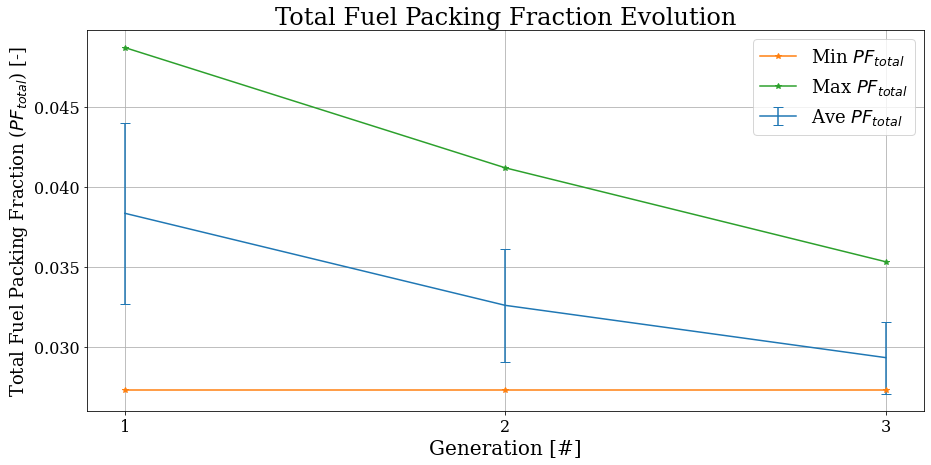

In [7]:
plot_1_obj(logbook, 0, "Total Fuel Packing Fraction", "$PF_{total}$", True, "slab-obj-1-pf-evol-coolant.png")

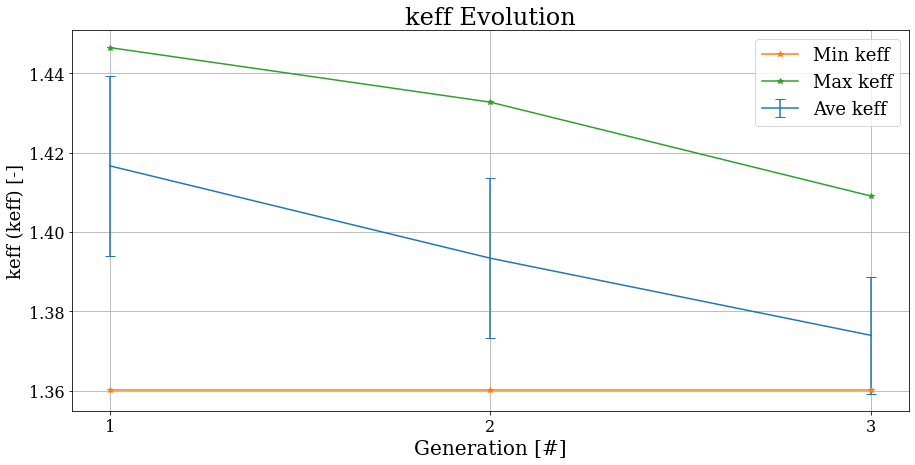

In [8]:
plot_1_obj(logbook, 1, "keff", "keff", False, "")

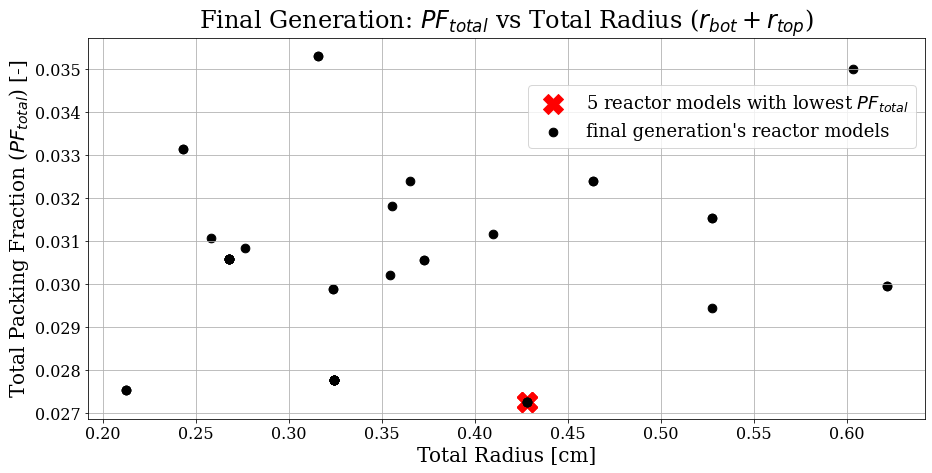

In [9]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
pop = results["populations"][-1]
oups = results["outputs"][-1]
obj_0 = np.array([item[0] for item in oups])
sorted_index_0 = np.argsort(obj_0)
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PF_{total}$")
            count += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', label="final generation's reactor models", 
                       s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0]+ind[1], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("Total Radius [cm]", fontsize=20)
ax.set_ylabel("Total Packing Fraction ($PF_{total}$) [-]", fontsize=20)
ax.set_title("Final Generation: $PF_{total}$ vs Total Radius ($r_{bot} + r_{top}$)", fontsize=24)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=18, bbox_to_anchor = [1.0, 0.9])
#ax.set_ylim(1.08, 1.10)
plt.savefig("slab-obj-1-pf-final-coolant.png",bbox_inches='tight', dpi=300)

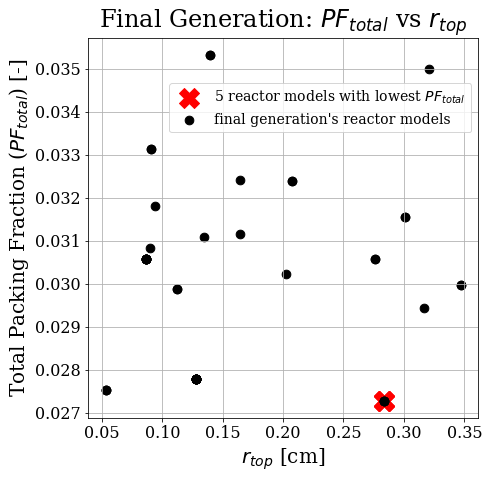

In [10]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
pop = results["populations"][-1]
oups = results["outputs"][-1]
obj_0 = np.array([item[0] for item in oups])
sorted_index_0 = np.argsort(obj_0)
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PF_{total}$")
            count += 1
        else:
            ax.scatter(ind[0], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[0], oup[0], marker='.', label="final generation's reactor models", 
                       s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[0], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("$r_{top}$ [cm]", fontsize=20)
ax.set_ylabel("Total Packing Fraction ($PF_{total}$) [-]", fontsize=20)
ax.set_title("Final Generation: $PF_{total}$ vs $r_{top}$", fontsize=24)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 0.9])
#ax.set_ylim(1.08, 1.10)
plt.savefig("slab-obj-1-pf-final-coolant-rtop.png",bbox_inches='tight', dpi=300)

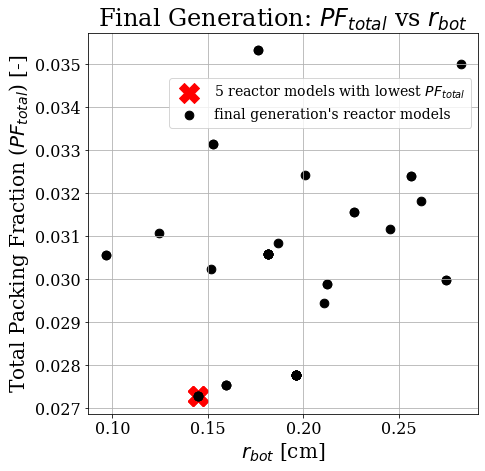

In [11]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(7,7))
pop = results["populations"][-1]
oups = results["outputs"][-1]
obj_0 = np.array([item[0] for item in oups])
sorted_index_0 = np.argsort(obj_0)
count, count2 = 0, 0
for i, ind in enumerate(pop):
    oup = oups[i]
    if i in sorted_index_0[:5]:
        if count == 0:
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red",
                       label="5 reactor models with lowest $PF_{total}$")
            count += 1
        else:
            ax.scatter(ind[1], oup[0], marker='X', s=400, color="red")
    else:
        if count2 == 0 and count > 0:
            ax.scatter(ind[1], oup[0], marker='.', label="final generation's reactor models", 
                       s=300, color="black")
            count2 += 1
        else:
            ax.scatter(ind[1], oup[0], marker='.', s=300, color="black")
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel("$r_{bot}$ [cm]", fontsize=20)
ax.set_ylabel("Total Packing Fraction ($PF_{total}$) [-]", fontsize=20)
ax.set_title("Final Generation: $PF_{total}$ vs $r_{bot}$", fontsize=24)
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 0.9])
#ax.set_ylim(1.08, 1.10)
plt.savefig("slab-obj-1-pf-final-coolant-rbot.png",bbox_inches='tight', dpi=300)

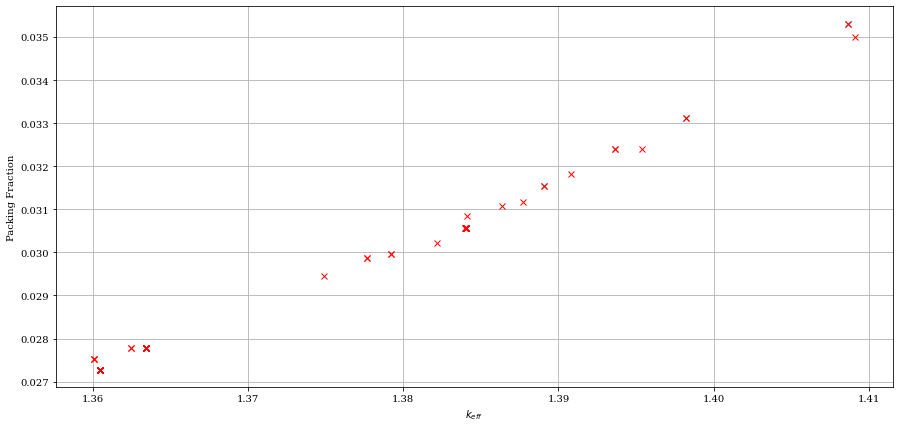

In [12]:
results = cp["all"]
fig, ax = plt.subplots(figsize=(15,7))
pop = results["populations"][-1]
oups = results["outputs"][-1]
for i, ind in enumerate(pop):
    oup = oups[i]
    ax.plot(oup[1], oup[0], 'rx')
ax.set_xlabel("$k_{eff}$")
ax.set_ylabel("Packing Fraction")
ax.grid()
#ax.set_ylim(1.08, 1.10)